In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier


# laste inn data
iris = load_iris()
print iris.feature_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# Splitte trening og test data
Først må vi splitte datasettet i to deler. En for trening av klassifisereren og en for testing. Det er viktig å splitte tilfeldig. For å gjøre det enkelt ser vi bare på to av egenskapene (petal length og petal width)

In [2]:
F1 = 2
F2 = 3

data = iris.data[:,[F1,F2]]

from sklearn.model_selection import train_test_split

train_data, test_data,train_target,  test_target = train_test_split(data, iris.target, test_size=0.33, random_state=42)


print train_data.shape
print test_data.shape

(100L, 2L)
(50L, 2L)


# Plot av klassene

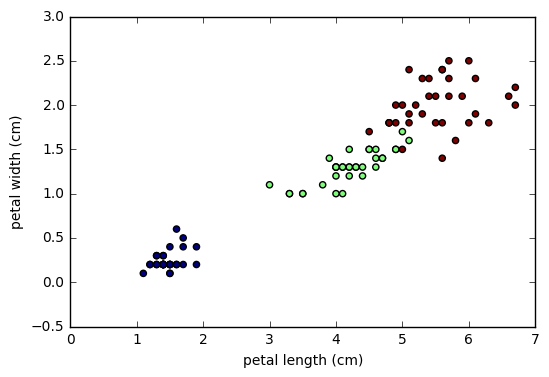

In [3]:
import matplotlib.pyplot as plt

plt.scatter(train_data[:,0],train_data[:,1],c=train_target)
plt.xlabel(iris.feature_names[F1])
plt.ylabel(iris.feature_names[F2])
plt.show()

In [4]:
# funksjon for å plotte besluttningsgrense for en klassifikator
def plot_boundary(X,y,clf,plot_step = 0.02):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    

# Beslutningstre

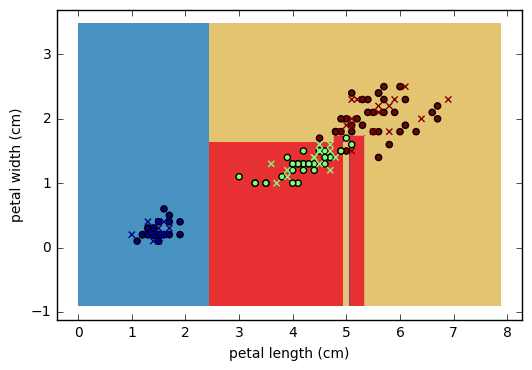

Accuracy score: 0.980000


In [5]:
target = iris.target

clf = tree.DecisionTreeClassifier()
clf.fit(train_data,train_target)

plot_boundary(data,target,clf)
plt.scatter(train_data[:,0],train_data[:,1],c=train_target,marker='o')
plt.scatter(test_data[:,0],test_data[:,1],c=test_target,marker='x') 

plt.xlabel(iris.feature_names[F1])
plt.ylabel(iris.feature_names[F2])
plt.show()


predictions = clf.predict(test_data)
print "Accuracy score: %f" %(predictions==test_target).mean()

# SVM klassifisering

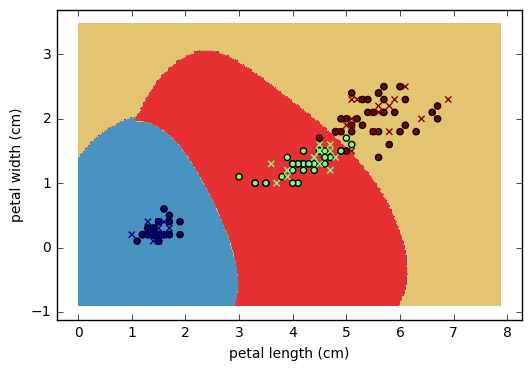

Accuracy score: 1.000000


In [6]:
clf = SVC()

clf.fit(train_data,train_target)

plot_boundary(data,target,clf)
plt.scatter(train_data[:,0],train_data[:,1],c=train_target,marker='o')
plt.scatter(test_data[:,0],test_data[:,1],c=test_target,marker='x') 

plt.xlabel(iris.feature_names[F1])
plt.ylabel(iris.feature_names[F2])
plt.show()


predictions = clf.predict(test_data)
print "Accuracy score: %f" %(predictions==test_target).mean()

# K nærmeste nabo klassifisering

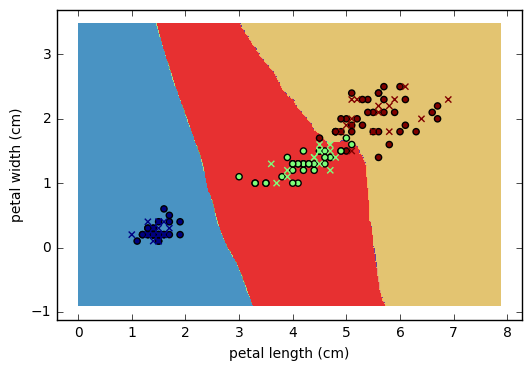

Accuracy score: 0.980000


In [8]:
clf = KNeighborsClassifier()

clf.fit(train_data,train_target)

plot_boundary(data,target,clf)
plt.scatter(train_data[:,0],train_data[:,1],c=train_target,marker='o')
plt.scatter(test_data[:,0],test_data[:,1],c=test_target,marker='x') 

plt.xlabel(iris.feature_names[F1])
plt.ylabel(iris.feature_names[F2])
plt.show()


predictions = clf.predict(test_data)
print "Accuracy score: %f" %(predictions==test_target).mean()

Test av ulike valg av k

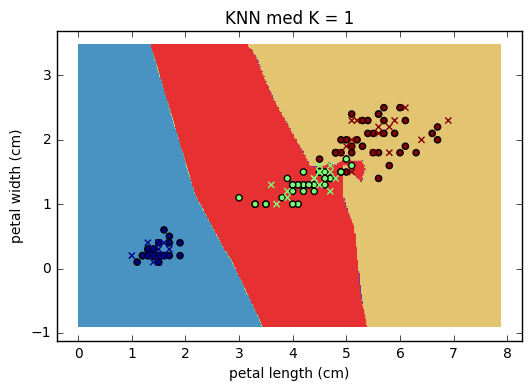

Accuracy score: 0.980000


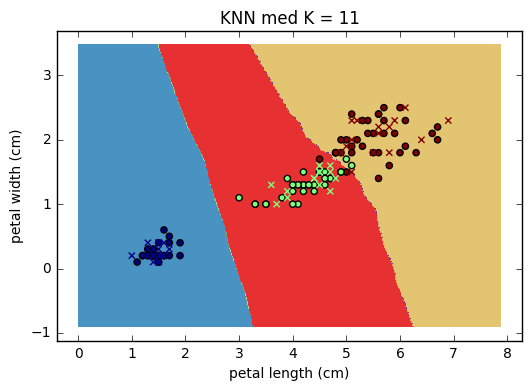

Accuracy score: 0.980000


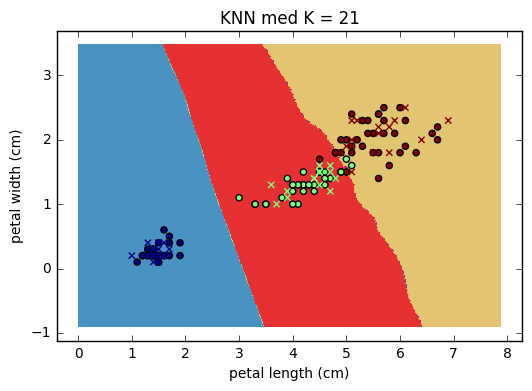

Accuracy score: 1.000000


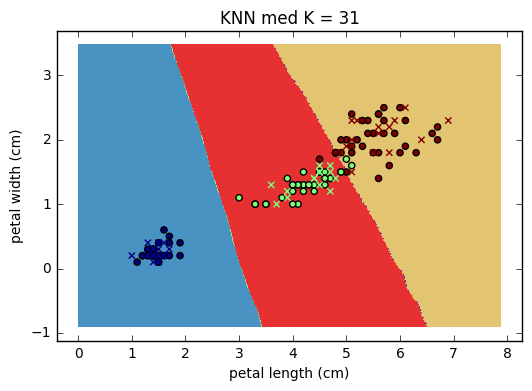

Accuracy score: 1.000000


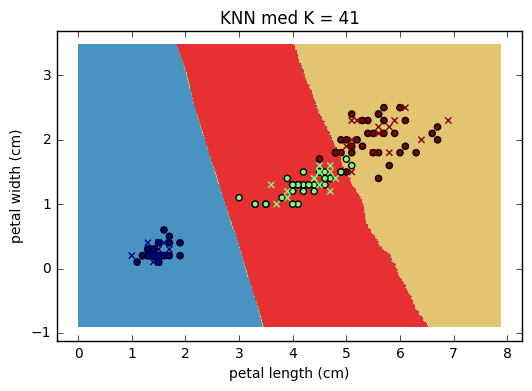

Accuracy score: 1.000000


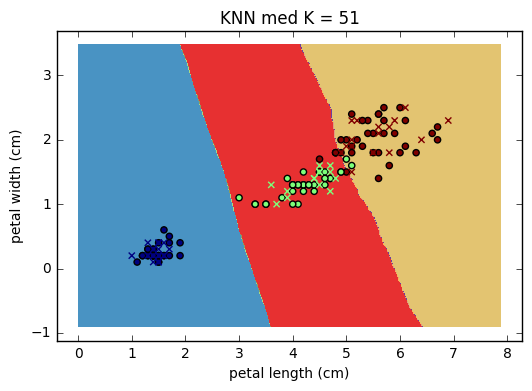

Accuracy score: 1.000000


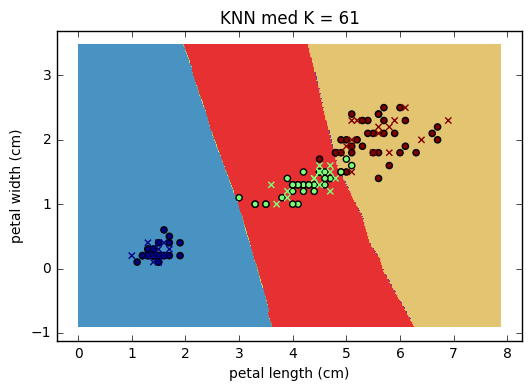

Accuracy score: 1.000000


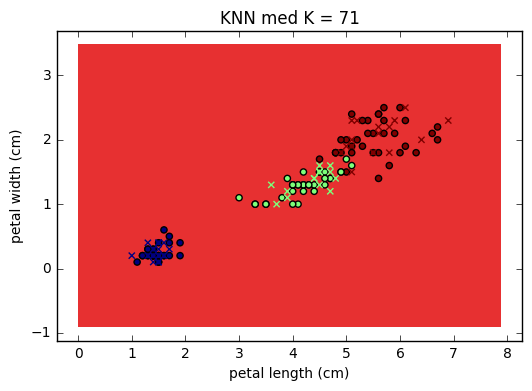

Accuracy score: 0.300000


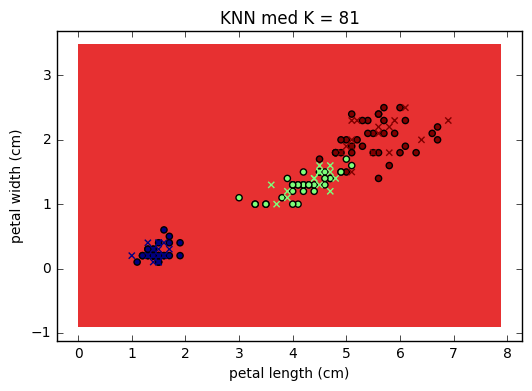

Accuracy score: 0.300000


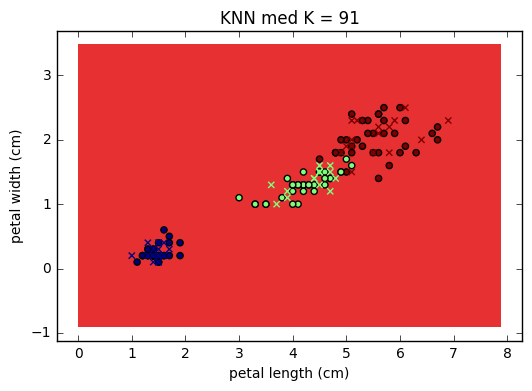

Accuracy score: 0.300000


In [10]:
for k in range(1,100,10):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_data,train_target)

    plot_boundary(data,target,clf)
    plt.scatter(train_data[:,0],train_data[:,1],c=train_target,marker='o')
    plt.scatter(test_data[:,0],test_data[:,1],c=test_target,marker='x') 

    plt.xlabel(iris.feature_names[F1])
    plt.ylabel(iris.feature_names[F2])
    plt.title("KNN med K = %d" %k)
    plt.show()


    predictions = clf.predict(test_data)
    print "Accuracy score: %f" %(predictions==test_target).mean()